In [25]:
import pandas as pd
#导入数据，无需清洗
datas = pd.read_excel("附件 C题数据.xlsx", index_col=0)
columns = datas.columns #参数名列表
undatas = datas[-10:]  #未知数据
datas = datas[:-10]  #已知数据
datas

,帮扶单位(0-159),帮扶单位类型（0-5),2015 SR,2015 CY,2015 HJ,2015 WJ,2015 SS,2015 总分,2020 SR,2020 CY,2020 HJ,2020 WJ,2020 SS,2020 总分
村庄编号,,,,,,,,,,,,,,
10761,1,0,2.30080,1.46570,1.03550,1.35350,1.15150,1.6616,2.1082,1.7979,1.6598,2.2456,2.1573,2.2792
10257,0,0,0.70758,1.73950,0.99283,1.26420,1.24630,1.4638,1.6524,1.7574,1.5755,2.4094,2.1002,2.2493
48346,138,1,0.85242,0.87260,0.95011,1.35350,0.67780,1.1379,2.1994,1.4735,1.7440,2.4094,2.1288,2.2493
25054,89,1,0.85242,1.37450,0.82196,1.17500,1.05680,1.2775,2.1082,1.6357,1.6598,2.3070,2.0716,2.2293
25136,89,1,0.85242,1.55700,1.12100,1.30880,1.24630,1.4870,2.0171,1.6357,1.7019,2.4094,2.0430,2.2293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31630,66,5,-2.26160,-2.13880,-0.16050,-1.94880,-2.16460,-1.9927,-3.1790,-3.5955,-2.9735,-2.1370,-2.5573,-3.3426
46668,132,5,-3.42030,-1.22620,-4.21850,-3.46610,-0.74339,-3.0983,-3.7259,-3.5955,-2.8051,-2.3828,-2.6144,-3.3626
33397,72,5,-1.53740,-0.45057,-3.06520,-0.69931,-1.88030,-1.8414,-3.3613,-3.1900,-2.9314,-2.2189,-2.9573,-3.3825


# 问题一

### 皮尔逊相关、斯皮尔曼相关、肯德尔相关分析，推荐使用斯皮尔曼

In [26]:
from scipy.stats import pearsonr, spearmanr, kendalltau

for i in range(2, 7):
    print(columns[i][-2:],
          '\n Pearson:', pearsonr(datas[columns[i]], datas[columns[i + 6]]),
          '\n Spearman:', spearmanr(datas[columns[i]], datas[columns[i + 6]]),
          '\n Kendal:', kendalltau(datas[columns[i]], datas[columns[i + 6]]))

SR 
 Pearson: PearsonRResult(statistic=0.5342331426847793, pvalue=0.0) 
 Spearman: SignificanceResult(statistic=0.540135842994333, pvalue=0.0) 
 Kendal: SignificanceResult(statistic=0.38556344055190456, pvalue=0.0)
CY 
 Pearson: PearsonRResult(statistic=0.6399494854009251, pvalue=0.0) 
 Spearman: SignificanceResult(statistic=0.6556294808939701, pvalue=0.0) 
 Kendal: SignificanceResult(statistic=0.47794424695990156, pvalue=0.0)
HJ 
 Pearson: PearsonRResult(statistic=0.7371621916822668, pvalue=0.0) 
 Spearman: SignificanceResult(statistic=0.8000999844936042, pvalue=0.0) 
 Kendal: SignificanceResult(statistic=0.6100453550237767, pvalue=0.0)
WJ 
 Pearson: PearsonRResult(statistic=0.6361167718700175, pvalue=0.0) 
 Spearman: SignificanceResult(statistic=0.6708342834915219, pvalue=0.0) 
 Kendal: SignificanceResult(statistic=0.48574120703172474, pvalue=0.0)
SS 
 Pearson: PearsonRResult(statistic=0.5944794574711155, pvalue=0.0) 
 Spearman: SignificanceResult(statistic=0.6357948047824924, pvalue

### 可视化 散点图

C:\Users\dell\AppData\Local\Temp\ipykernel_14620\2200171309.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=2)


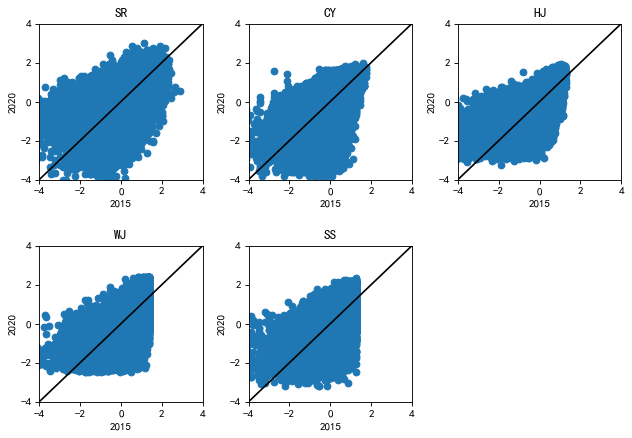

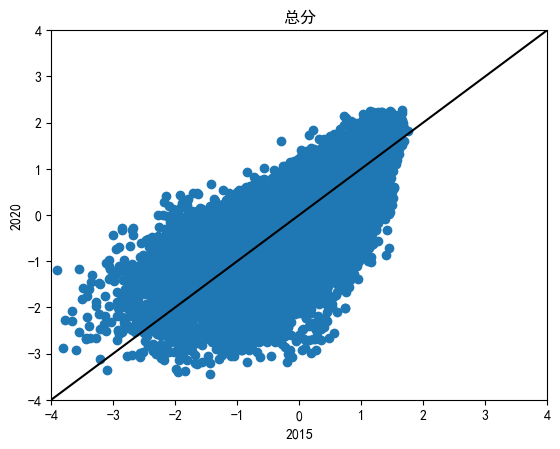

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8), dpi=80)

for i in range(2, 7):
    plt.subplot(3,3,i-1)
    plt.tight_layout(h_pad=2)
    plt.scatter(x=datas.iloc[:,i], y=datas.iloc[:,i+6])
    plt.title(columns[i][-2:])
    plt.xlabel(columns[i][:-3])
    plt.ylabel(columns[i + 6][:-3])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    # fig_name = './' + '散点图' + columns[i][-2:]
    plt.plot([-5,5],[-5,5],color='0')
    # plt.savefig(fig_name)

plt.savefig('./散点图（分）')
plt.show()

i=7
plt.scatter(x=datas.iloc[:,i], y=datas.iloc[:,i+6])
plt.title(columns[i][-2:])
plt.xlabel(columns[i][:-3])
plt.ylabel(columns[i + 6][:-3])
plt.xlim(-4,4)
plt.ylim(-4,4)
# fig_name = './' + '散点图' + columns[i][-2:]
plt.plot([-5,5],[-5,5],color='0')
plt.savefig('./散点图（总）')
plt.show()

### 可视化 相关性热力图

In [28]:
# import pandas as pd 
# import numpy as np 
# import seaborn as sns 
# import matplotlib.pyplot as plt 
# # 假设data是一个包含五年前和2020年评分数据的DataFrame 
# data = pd.read_excel("附件 C题数据.xlsx")
# correlation_matrix = data[['2015 SR', '2020 SR', '2015 CY', '2020 CY', '2015 HJ', '2020 HJ', '2015 WJ', '2020 WJ', '2015 SS', '2020 SS']].corr() # 可视化相关性矩阵 
# plt.figure(figsize=(10, 8)) 
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
# plt.title('Correlation between scores from 5 years ago and 2020') 
# plt.show()

### 回归分析

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
for i in range(2,7):
    x_train, x_test, y_train, y_test = train_test_split(datas.iloc[:,i], datas.iloc[:,i+6], test_size=0.25)
    Linear = LinearRegression()
    Linear.fit(x_train.values.reshape(-1, 1),y_train)
    r_sq = Linear.score(x_train.values.reshape(-1, 1), y_train)
    print(columns[i][-2:],
          '\n','coefficient of determination:', r_sq,
          '\n','intercept:', Linear.intercept_,
          '\n','slope:', Linear.coef_)

SR 
 coefficient of determination: 0.28600811583758934 
 intercept: 0.003067337952191211 
 slope: [0.52488833]
CY 
 coefficient of determination: 0.4132442740496308 
 intercept: -0.1463069678529951 
 slope: [0.76812419]
HJ 
 coefficient of determination: 0.5465712899623082 
 intercept: -0.08590812558287528 
 slope: [0.80486385]
WJ 
 coefficient of determination: 0.4046319279512509 
 intercept: -0.17008610060896318 
 slope: [0.74155404]
SS 
 coefficient of determination: 0.35179906477943257 
 intercept: -0.13835279274026305 
 slope: [0.70957342]


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
for i in range(2,7):
    x_train, x_test, y_train, y_test = train_test_split(datas.iloc[:,i], datas.iloc[:,i+6], test_size=0.25)
    Linear = LinearRegression()
    Linear.fit(x_train.values.reshape(-1, 1),y_train)
    r_sq = Linear.score(x_train.values.reshape(-1, 1), y_train)
    print(columns[i][-2:],
          '\n','coefficient of determination:', r_sq,
          '\n','intercept:', Linear.intercept_,
          '\n','slope:', Linear.coef_)

SR 
 coefficient of determination: 0.2893344166255867 
 intercept: -0.0016359983182310314 
 slope: [0.52647158]
CY 
 coefficient of determination: 0.40958275309488557 
 intercept: -0.1470300394314375 
 slope: [0.76868543]
HJ 
 coefficient of determination: 0.543029154048581 
 intercept: -0.0817219544336313 
 slope: [0.79881236]
WJ 
 coefficient of determination: 0.40569714424183145 
 intercept: -0.1664302798631626 
 slope: [0.73776459]
SS 
 coefficient of determination: 0.35059891948644795 
 intercept: -0.14271421207270377 
 slope: [0.71839926]


# 问题二

### 计算各参数提升量

In [31]:
for i in range(2,8):
    colname='dif '+columns[i][-2:]
    datas[colname]=datas.iloc[:,i+6]-datas.iloc[:,i]
columns = datas.columns #参数名列表更新

### 可视化，提升量总览，放弃吧，基本没法看，要看可以直接取消这里的所有注释

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']

# for i in datas['帮扶单位(0-159)'].value_counts().keys():
#     for j in range(14,20):
#         y=datas.iloc[:,j].loc[datas['帮扶单位(0-159)']==i]
#         x=np.tile(columns[j],len(y))
#         plt.scatter(x,y)
#         plt.ylim(-4,4)
#     plt.show()

### 可视化，提升量平均值，结果比较意外，但是我目前没发现代码问题

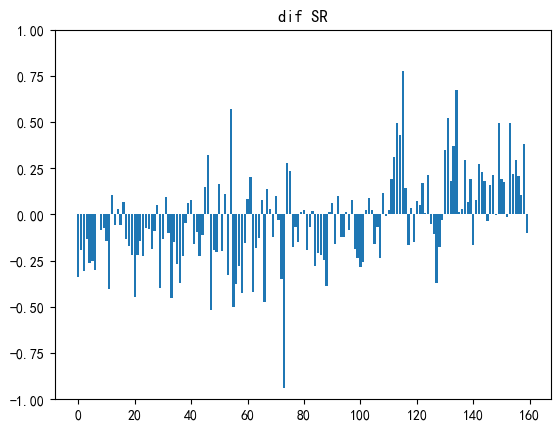

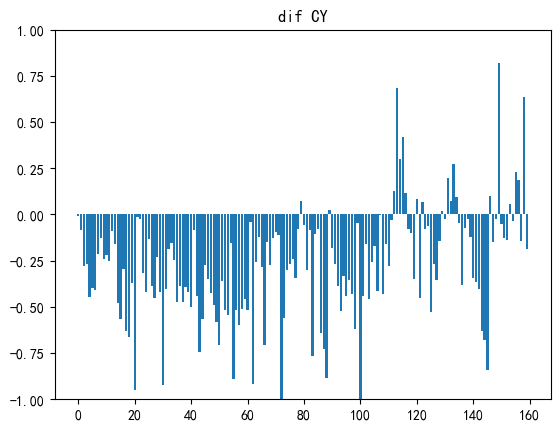

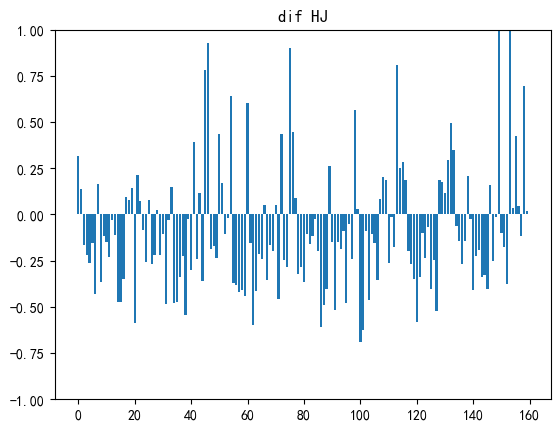

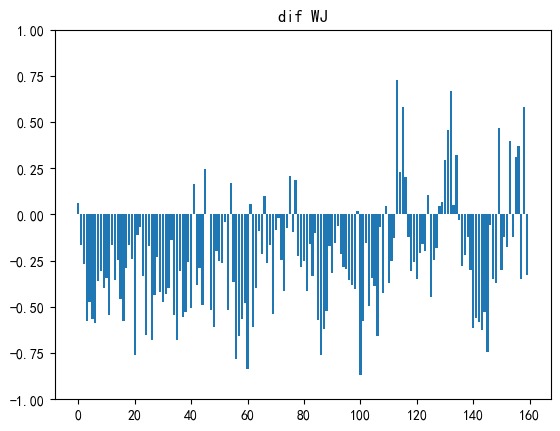

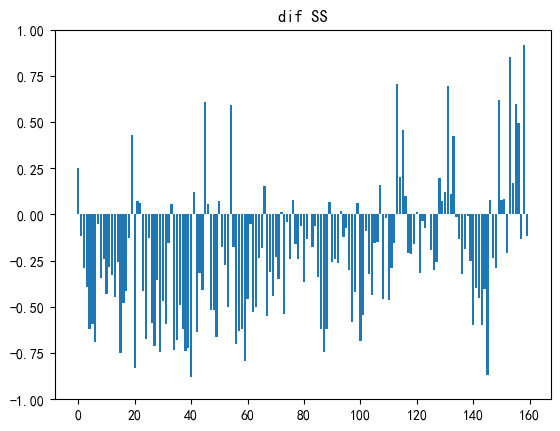

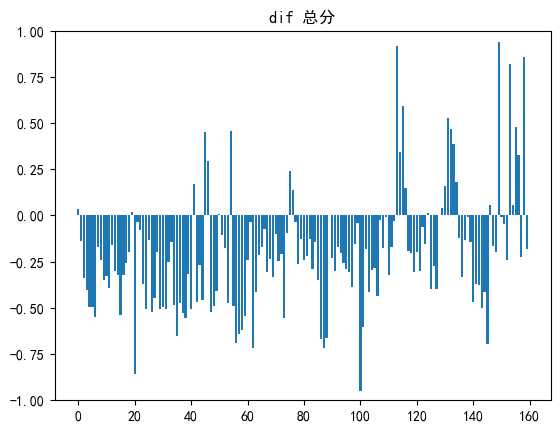

,帮扶单位类型（0-5),dif SR,dif CY,dif HJ,dif WJ,dif SS,dif 总分
帮扶单位(0-159),,,,,,,
138,1.0,0.067347,-0.025998,0.207697,-0.119193,-0.007749,-0.007572
129,1.0,-0.029051,0.018465,0.17491,0.069762,0.07424,0.042744
146,1.0,0.157798,0.100281,0.161943,-0.058918,0.080136,0.054949
116,1.0,0.143249,0.115898,0.185267,0.200659,0.100727,0.148324
89,1.0,0.011771,0.023375,0.261775,-0.169933,0.070051,0.003148
...,...,...,...,...,...,...,...
19,2.0,-0.219588,-0.368233,0.143023,-0.242186,0.431671,0.016201
60,3.0,0.082807,-0.517122,0.600881,-0.837076,-0.457009,-0.238497
8,2.0,-0.083127,-0.126877,-0.367428,-0.304842,-0.345976,-0.239738


In [33]:
import matplotlib.pyplot as plt

dif_mean=pd.DataFrame(columns=[ '帮扶单位类型（0-5)','dif SR', 'dif CY', 'dif HJ', 'dif WJ',
                       'dif SS', 'dif 总分'], index=datas['帮扶单位(0-159)'].value_counts().keys())
for i in dif_mean.index:
    for j in dif_mean.columns:
        dif_mean.loc[i,j]=np.mean(datas[j].loc[datas['帮扶单位(0-159)']==i])

for i in dif_mean.columns[1:]:
    plt.bar(x=dif_mean.index,height=dif_mean[i].values)
    plt.title(i)
    plt.ylim(-1,1)
    plt.show()
dif_mean

### 可视化，与上同，不过是方差

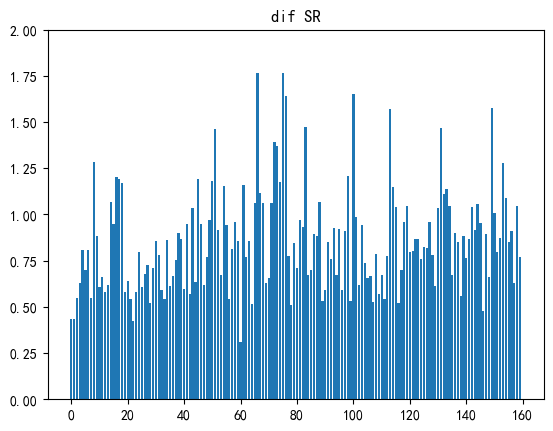

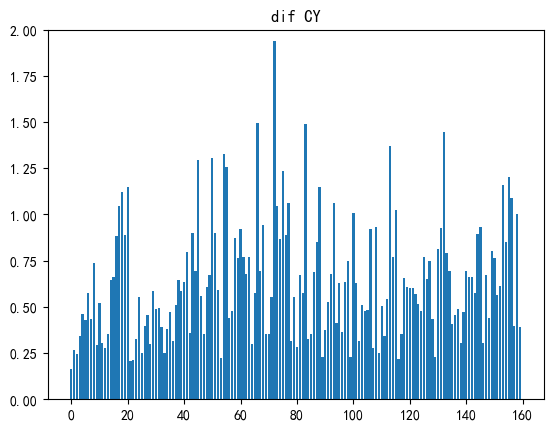

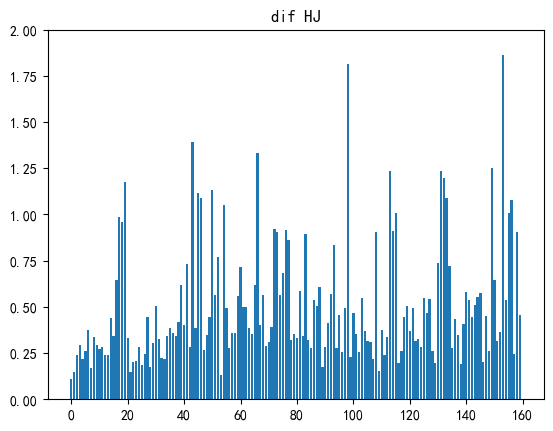

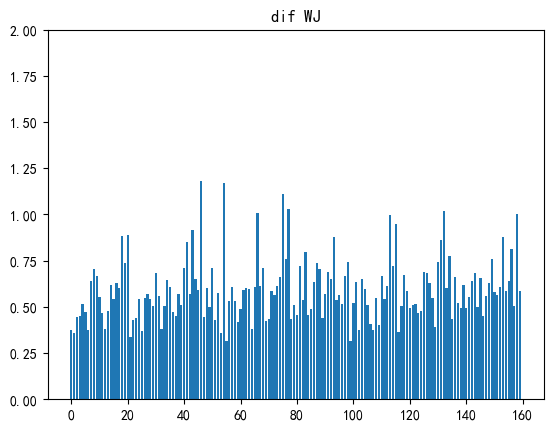

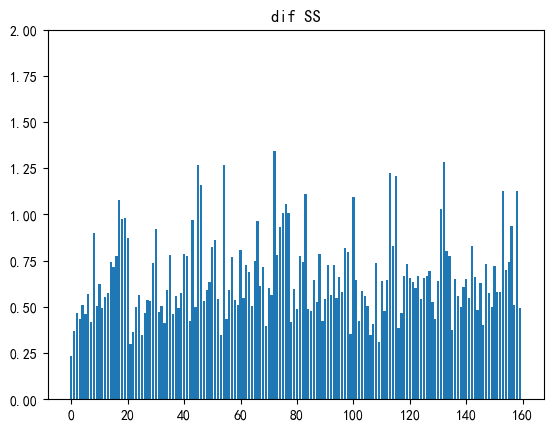

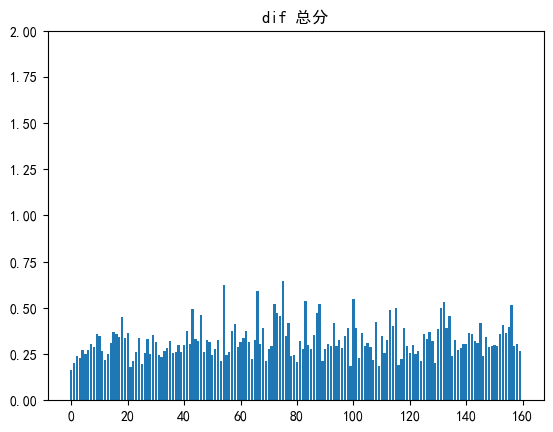

,帮扶单位类型（0-5),dif SR,dif CY,dif HJ,dif WJ,dif SS,dif 总分
帮扶单位(0-159),,,,,,,
138,0.0,0.56036,0.302504,0.191574,0.494941,0.498749,0.282014
129,0.0,0.610926,0.226419,0.195997,0.392833,0.432105,0.202882
146,0.0,0.479839,0.30269,0.201928,0.45235,0.403101,0.241752
116,0.0,0.52267,0.217352,0.193734,0.363326,0.385268,0.191207
89,0.0,0.529641,0.228162,0.172202,0.438697,0.421022,0.210314
...,...,...,...,...,...,...,...
19,0.0,0.582807,0.891648,1.175859,0.738785,0.983612,0.335148
60,0.0,0.307667,0.920164,0.716965,0.486281,0.807904,0.315554
8,0.0,1.284521,0.738149,0.334743,0.705991,0.902291,0.288029


In [34]:
import numpy as np
import matplotlib.pyplot as plt

dif_var=pd.DataFrame(columns=[ '帮扶单位类型（0-5)','dif SR', 'dif CY', 'dif HJ', 'dif WJ',
                                'dif SS', 'dif 总分'], index=datas['帮扶单位(0-159)'].value_counts().keys())
for i in dif_var.index:
    for j in dif_var.columns:
        dif_var.loc[i,j]=np.var(datas[j].loc[datas['帮扶单位(0-159)']==i])

for i in dif_var.columns[1:]:
    plt.bar(x=dif_var.index,height=dif_var[i].values)
    plt.title(i)
    plt.ylim(0,2)
    plt.show()
dif_var

### 区分不同的单位类型，仅仅对总分提升绘图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


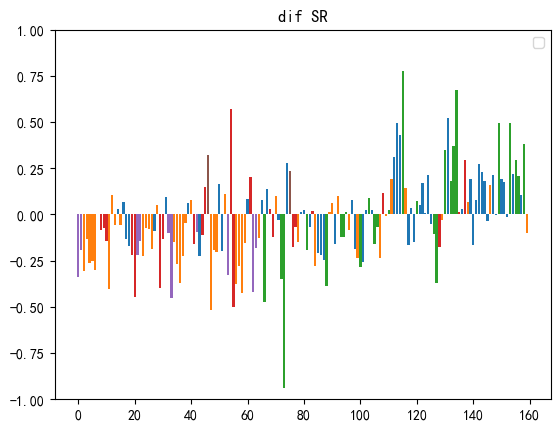

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


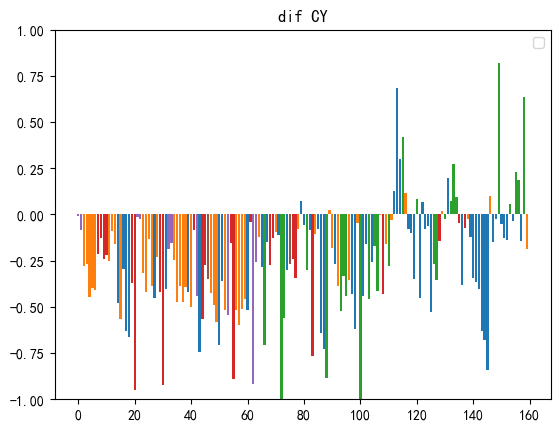

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


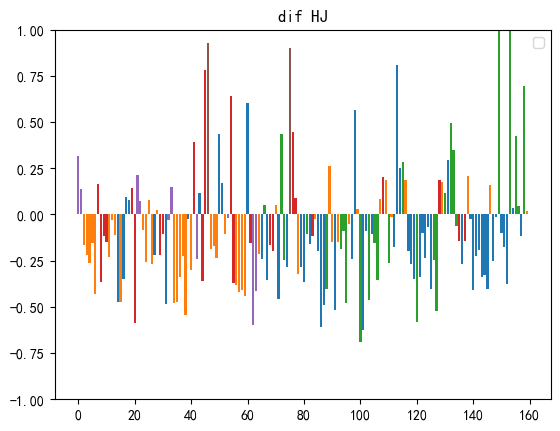

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


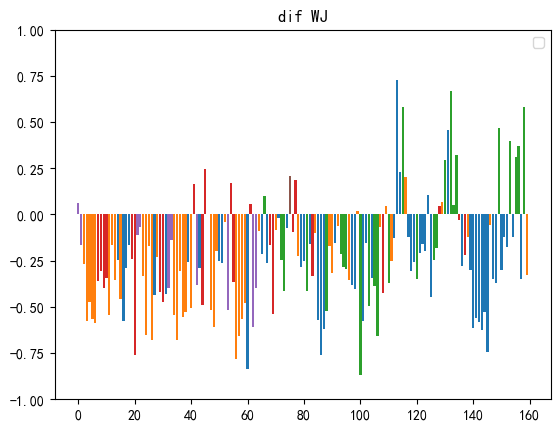

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


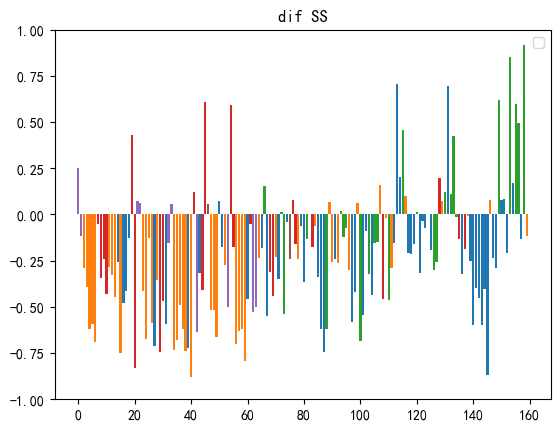

In [48]:
for j in dif_mean.columns[1:-1]:
    for i in dif_mean['帮扶单位类型（0-5)'].value_counts().keys():
        data=dif_mean.loc[dif_mean['帮扶单位类型（0-5)']==i]
        plt.bar(x=data.index,height=data[j].values)
        plt.ylim(-1,1)
    plt.title(j)
    plt.legend()
    plt.show()


### 提升的前十名（注意第三问只需要前5名）

In [53]:
for i in dif_mean.columns[1:]:
    print(i,'提升量最大的十名',dif_mean.sort_values(by=i,ascending=False).index[:10])

dif SR 提升量最大的十名 Index([115, 134, 54, 131, 113, 149, 153, 114, 158, 133], dtype='int64', name='帮扶单位(0-159)')
dif CY 提升量最大的十名 Index([149, 113, 158, 115, 114, 133, 155, 131, 156, 112], dtype='int64', name='帮扶单位(0-159)')
dif HJ 提升量最大的十名 Index([149, 153, 46, 75, 113, 45, 158, 54, 60, 98], dtype='int64', name='帮扶单位(0-159)')
dif WJ 提升量最大的十名 Index([113, 132, 158, 115, 149, 131, 153, 156, 134, 155], dtype='int64', name='帮扶单位(0-159)')
dif SS 提升量最大的十名 Index([158, 153, 113, 131, 149, 45, 155, 54, 156, 115], dtype='int64', name='帮扶单位(0-159)')
dif 总分 提升量最大的十名 Index([149, 113, 158, 153, 115, 131, 155, 132, 54, 45], dtype='int64', name='帮扶单位(0-159)')


# 问题三

### 都在上面问题二了，一起的